In [1]:
!pip install opencv-python

In [2]:
import keras
from keras.datasets import mnist
import tensorflow as tf

Using TensorFlow backend.


In [3]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 12s 1us/step


In [4]:
from tensorflow.keras import backend as K

train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [5]:
nums = ['CERO', 'UNO', 'DOS', 'TRES', 'CUATRO', 'CINCO', 'SEIS', 'SIETE', 'OCHO', 'NUEVE']

In [6]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


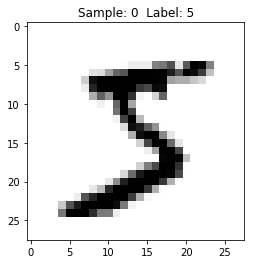

CINCO


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

model = tf.keras.models.load_model('MNIST-HandWriting-CNN.model')

def prepare(index):
    
    #Print the one-hot array of this sample's label 
    print(train_labels[index])  
    #Print the label converted back to a number
    label = train_labels[index].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[index].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (index, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
    return train_images[index].reshape(1, 28, 28, 1)

p = model.predict_classes([prepare(0)])
print(nums[p[0]])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


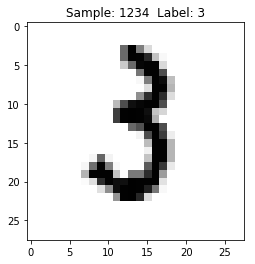

TRES


In [8]:
p = model.predict_classes([prepare(1234)])
print(nums[p[0]])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


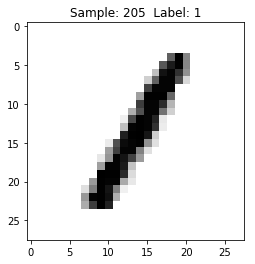

UNO


In [9]:
p = model.predict_classes([prepare(205)])
print(nums[p[0]])

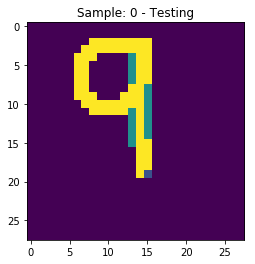

[1]
UNO


In [10]:
import cv2
def prepareImage(filename):
    img_arr = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    img_arr = cv2.resize(img_arr, (28, 28))
    
    plt.title('Sample: 0 - Testing')
    plt.imshow(img_arr)
    plt.show()
    
    return img_arr.reshape(1, 28, 28, 1)

p = model.predict_classes([prepareImage('uploaded.png')])
print(p)
print(nums[p[0]])

In [19]:
img_arr = cv2.imread('uploaded.png', cv2.IMREAD_GRAYSCALE)
img_arr = cv2.resize(img_arr, (28, 28))
img_arr = img_arr.reshape(28, 28, 1)

import numpy as np
from keras.utils import np_utils

images = np.array(img_arr)
images = images.reshape(1,28,28,1)

feature_data = np.array(images);
label_data = np.array([1])

label_data = np_utils.to_categorical(label_data, 10)
print(label_data)

history = model.fit(feature_data, label_data, verbose=2)


[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
 - 0s - loss: 16.1181 - acc: 0.0000e+00


In [18]:
import numpy as np
from keras.utils import np_utils

img_arr = cv2.imread('uploaded.png', cv2.IMREAD_GRAYSCALE)
img_arr = cv2.resize(img_arr, (28, 28))
img_arr = img_arr.reshape(28, 28, 1)

images = np.array(img_arr)
images = images.reshape(1,28,28,1)

feature_data = np.array(images);
label_data = np.array([1])

label_data = np_utils.to_categorical(label_data, 10)

batch = model.train_on_batch(feature_data, label_data)
print(batch)

[16.118095, 0.0]


In [13]:
model.save("MNIST-HandWriting-CNN.model")

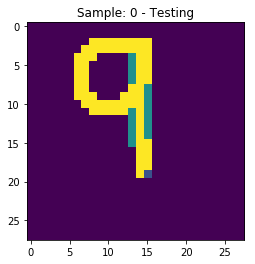

[1]
UNO


In [20]:
p = model.predict_classes([prepareImage('uploaded.png')])
print(p)
print(nums[p[0]])

In [30]:
import numpy as np
from keras.utils import np_utils

img_arr = cv2.imread('uploaded.png', cv2.IMREAD_GRAYSCALE)
img_arr = cv2.resize(img_arr, (28, 28))
img_arr = img_arr.reshape(28, 28, 1)

images = np.array(img_arr)
images = images.reshape(1,28,28,1)

feature_data = np.array(images);
label_data = np.array([9])

label_data = np_utils.to_categorical(label_data, 10)

weights = np.array([10])

print(label_data)

batch = model.train_on_batch(feature_data, label_data, weights)
print(batch)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[16.118095, 0.0]


In [27]:
score = model.evaluate(feature_data, label_data, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 16.11809539794922
Test accuracy: 0.0
